#**Trabalho Prático de Aquisição, Pré-processamento e Exploração de Dados**

Equipe 8:
*  Gian Giovanni Rodrigues da Silva

*  Jessyca Jordanna Barroso de Moraes

*  Tammy Hikari Yanai Gusmão

*  Thalita Naiara Andre Alves

##Apresentação do Dataset e Conceitos Importantes

O *dataset* escolhido para o Trabalho Prático se chamada *Students Performence in Examns*, que tem como objetivo ajudar a compreender o desempenho dos alunos ao considerar a influência da formação dos pais, preparação de testes, etc. Foi constatado que não existem dados faltantes e instâncias duplicadas. 

O dataset possui 1000 instâncias e conta com as seguintes colunas originais:
*  `gender`, representado pelos valores conhecidos "female" e "male";
*  `race/ethnicity`, representado por grupos de A a D;
*  `parental level of education`,	representado por seis graus de escolaridade dos pais;
*  `lunch`, que mostra uma representação do direito dado ao aluno, de acordo com o ganho salarial dos pais;
*  `test preparation course`,	representando o atendimento ou a falta de algum curso preparatório;
*  `math score`, representando a nota da avaliação na displina de matemática;
*  `reading score`, representando a nota da avaliação de leitura;
*  `writing score`, representando a nota da avaliação de escrita.

Assim, temos cinco atributos categóricos e três atributos numéricos.

Ficou acordado entre os integrantes da equipe que as perguntas de négocios a serem respondidas são:

1. Performance dos gêneros em diferentes matérias (leitura, escrita, matemática).
2. O fato de ir bem nas matérias tem a ver com ter participado de curso preparatório?
4. Ter direito a almoço tem a ver com ir bem nas matérias?
5. Quem vai bem em matemática se sai bem nas outras matérias também?
6. Qual seria a melhor maneira de melhorar a pontuação dos estudantes em cada teste?
7. A escolaridade dos pais influenciam nas notas dos filhos?


Fonte: [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams).

##Imports e Aquisição do Dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import plotly.express as px

import statsmodels.graphics.api as smg
from scipy import stats

from sklearn.feature_selection import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original = pd.read_csv('/content/drive/Shareddrives/modulo4/Trabalho Final/StudentsPerformance.csv', sep = ',')
df_original

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Primeiramente foi realizada a padronização das colunas do *dataset*, pois algumas apresentam separações por barra ("/") e/ou por espaços em branco. 

In [ ]:
df = df_original.rename(columns = {'race/ethnicity':'race_ethn', 'parental level of education':'p_lev_educ', 
                     'test preparation course':'test_prep_course', 'math score':'math_score', 
                     'reading score':'reading_score','writing score':'writing_score'})

df.head()

,gender,race_ethn,p_lev_educ,lunch,test_prep_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Visualização do Dataset

Convém apresentar os dados originais do *dataset*, antes de realizar alguma modificação deles. Abaixo é possível visualizar os dados únicos das colunas categóricas:

In [ ]:
groups = sorted(df.race_ethn.unique())
print("Grupos Étnicos:", groups)

gen_labels = sorted(df.gender.unique())
print("Gêneros:", gen_labels)

ple_labels = sorted(df.p_lev_educ.unique())
print("Escolaridade dos Pais:", ple_labels)

lunch_labels = sorted(df.lunch.unique())
print("Tipos de Almoço:", lunch_labels)

tpc_labels = sorted(df.test_prep_course.unique())
print("Curso Preparatório para o Teste:", tpc_labels)

Grupos Étnicos: ['group A', 'group B', 'group C', 'group D', 'group E']
Gêneros: ['female', 'male']
Escolaridade dos Pais: ["associate's degree", "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school']
Tipos de Almoço: ['free/reduced', 'standard']
Curso Preparatório para o Teste: ['completed', 'none']


##### Gênero

female    518
male      482
Name: gender, dtype: int64


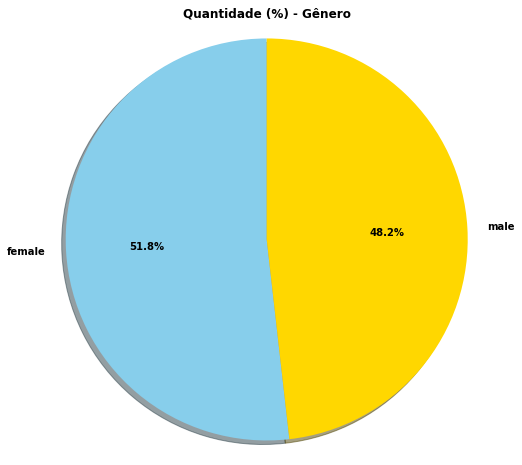

In [ ]:
print(df["gender"].value_counts())
sizes = [df.gender.value_counts()[gen_labels[0]],
         df.gender.value_counts()[gen_labels[1]]]
colors = ['skyblue','gold']
explode = (0, 0,)
fig1, ax1 = plt.subplots(figsize =(8,8))
ax1.pie(sizes,colors = colors ,explode=explode, labels=gen_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontweight': 'bold'})
ax1.axis('equal')
plt.title('Quantidade (%) - Gênero', fontweight = 'bold')
plt.show()

As mulheres possuem um volume maior que o homens referente a dataset, representando quase 52% do volume, enquanto os homens representam um 48%.

#####Escolaridade dos Pais

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: p_lev_educ, dtype: int64


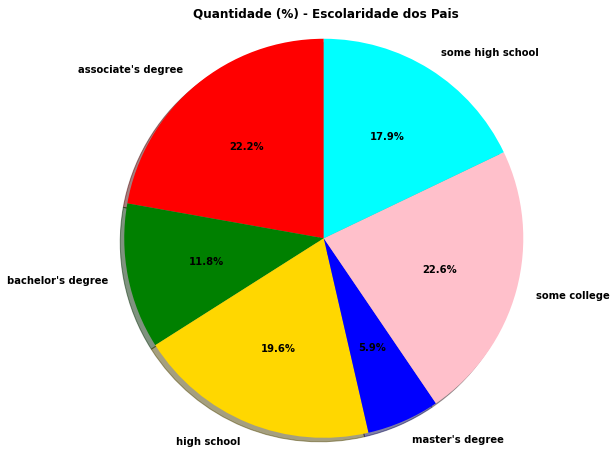

In [ ]:
print(df["p_lev_educ"].value_counts())

sizes = [df.p_lev_educ.value_counts()[ple_labels[0]], 
         df.p_lev_educ.value_counts()[ple_labels[1]],
         df.p_lev_educ.value_counts()[ple_labels[2]],
         df.p_lev_educ.value_counts()[ple_labels[3]],
         df.p_lev_educ.value_counts()[ple_labels[4]],
         df.p_lev_educ.value_counts()[ple_labels[5]]]

colors = ["red","green","gold","blue","pink","cyan"]
explode = (0, 0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize =(8,8))
ax1.pie(sizes,colors = colors ,explode=explode, labels=ple_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontweight': 'bold'})
ax1.axis('equal')
plt.title('Quantidade (%) - Escolaridade dos Pais', fontweight = 'bold')
plt.show()

De acordo com o gráfico acima, a maior parte dos pais tem graduação incompleta ("some college"). Logo em seguida, temos pais que possuem graduação com especialização ("associate's degree"), ensino médio completo ("high school") e incompleto ("some high school"), graduação ("bachelor's degree") e mestrado ("master's degree").

#####Análise por tipo de Almoço


standard        645
free/reduced    355
Name: lunch, dtype: int64


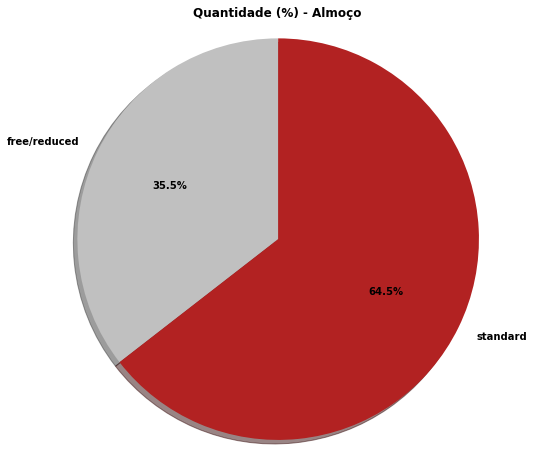

In [ ]:
print(df["lunch"].value_counts())
sizes = [ df.lunch.value_counts()[lunch_labels[0]], 
         df.lunch.value_counts()[lunch_labels[1]]]
colors = ["silver","firebrick"]
explode = (0, 0)
fig1, ax1 = plt.subplots(figsize =(8,8))
ax1.pie(sizes,colors = colors ,explode=explode, labels=lunch_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontweight': 'bold'})
ax1.axis('equal')
plt.title('Quantidade (%) - Almoço', fontweight = 'bold')
plt.show()

O gráfico acima nos mostra que 64,5% dos alunos possuem direito a almoço padrão, enquanto 35,5% dos alunos possuem direito reduzido ou simplesmente não têm. 

#####Gênero vs Grupos Étnicos

In [ ]:
def cont_genderByEthn(_df, gender, array):
  array_cont = []
  for x in array:
    cont = 0
    for index,row in _df.iterrows():
      if row['gender'] == gender and row['race_ethn'] == x:
        cont = cont + 1
    array_cont.append(int(cont))

  return array_cont

In [ ]:
array_fem_ethn = cont_genderByEthn (df, 'female', groups)
array_male_ethn = cont_genderByEthn(df, 'male', groups)

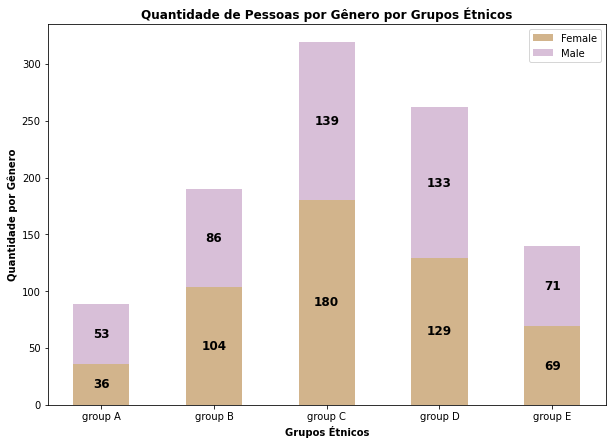

In [ ]:
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

ax1 = ax.bar(x = groups, 
             height = array_fem_ethn, 
             width = 0.5,
             label = 'Female', 
             color = 'tan')
ax2 = ax.bar(x = groups, 
             height = array_male_ethn,
             label = 'Male', 
             width = 0.5,
             bottom = array_fem_ethn, 
             color = 'thistle')

for r1, r2 in zip(ax1, ax2):
  h1 = r1.get_height()
  h2 = r2.get_height()

  if h1 != 0:
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', 
             va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
  if h2 != 0:
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', 
             va ='center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.title('Quantidade de Pessoas por Gênero por Grupos Étnicos', fontweight = 'bold')
plt.legend(loc ="upper right") 
plt.xlabel('Grupos Étnicos', fontweight = 'bold')
plt.ylabel('Quantidade por Gênero', fontweight = 'bold')

plt.show()

Como pode ser observado no gráfico acima, o *dataset* contém mais dados do grupo étnico C, seguido dos grupos D, B, E e A. Em relação a quantidade de pessoas por gênero em cada grupo, temos:
*  Grupo A: Mulheres > Homens;
*  Grupo B: Mulheres > Homens;
*  Grupo C: Mulheres > Homens;
*  Grupo D: Mulheres < Homens;
*  Grupo E: Mulheres < Homens.

##### Gênero vs Disciplinas

Text(0, 0.5, 'Média das notas de matemática')

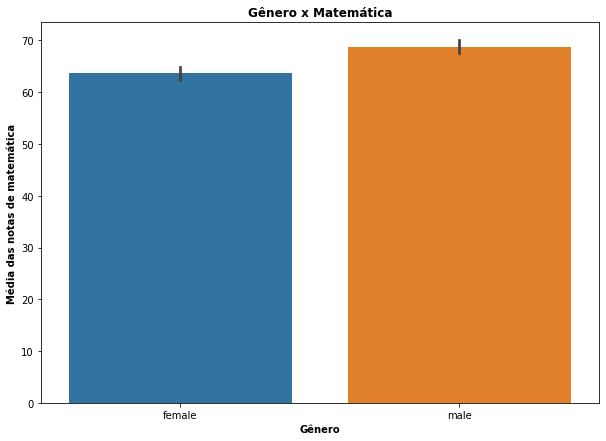

In [ ]:
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
sns.barplot(x = 'gender', y = 'math_score', data = df);
plt.title('Gênero x Matemática', fontweight = 'bold');
plt.xlabel('Gênero', fontweight = 'bold')
plt.ylabel('Média das notas de matemática', fontweight = 'bold')

O gênero masculino possui média das notas maior que o feminino em relação a Matemática.

Text(0, 0.5, 'Média das notas de leitura')

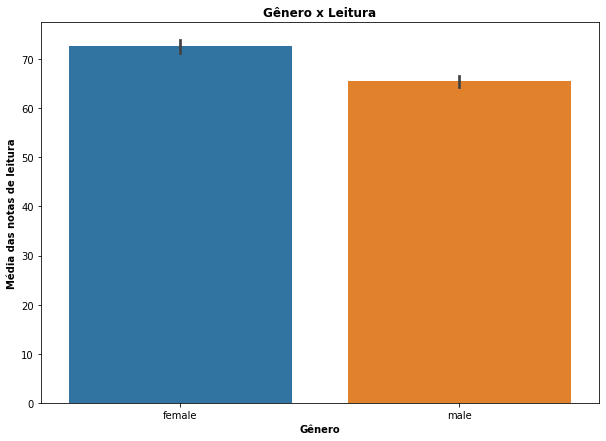

In [ ]:
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
sns.barplot(x = 'gender', y = 'reading_score', data = df);
plt.title('Gênero x Leitura', fontweight = 'bold');
plt.xlabel('Gênero', fontweight = 'bold')
plt.ylabel('Média das notas de leitura', fontweight = 'bold')

O gênero feminino possui média das notas maior que o masculino em relação a Leitura.

Text(0, 0.5, 'Média das notas de escrita')

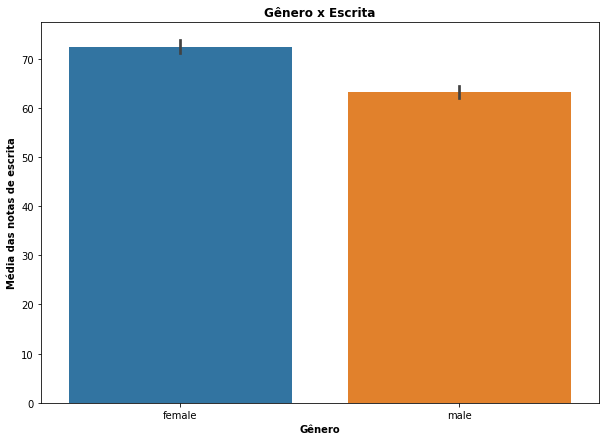

In [ ]:
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
sns.barplot(x = 'gender', y = 'writing_score', data = df);
plt.title('Gênero x Escrita', fontweight = 'bold');
plt.xlabel('Gênero', fontweight = 'bold')
plt.ylabel('Média das notas de escrita', fontweight = 'bold')

O gênero feminino possui média das notas maior que o masculino em relação a Escrita.

In [ ]:
# Gênero Masculino
df_male = df[df['gender'] == 'male']
df_male_math = df_male['math_score']
df_male_reading = df_male['reading_score']
df_male_writing = df_male['writing_score']

# Gênero Feminino
df_fem = df[df['gender'] == 'female']
df_fem_math = df_fem['math_score']
df_fem_reading = df_fem['reading_score']
df_fem_writing = df_fem['writing_score']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Média das notas de matemática dos homens: 68.7
Média das notas de matemática das mulheres: 63.6


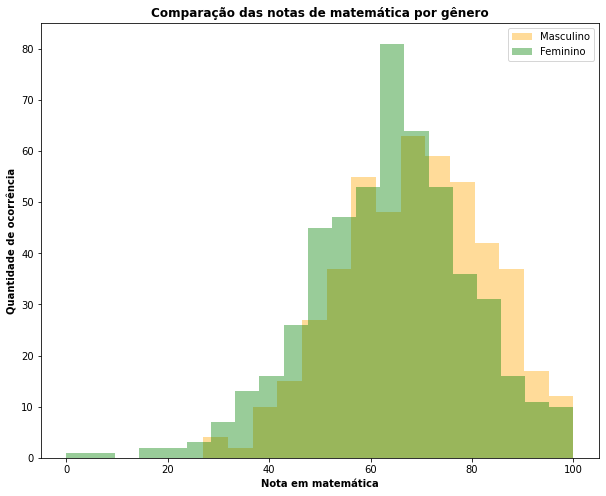

In [ ]:
plt.figure(figsize = (10,8), facecolor = 'w');
sns.distplot(df_male_math, kde = False, label = 'Masculino', color = 'orange')
sns.distplot(df_fem_math, kde= False, label = 'Feminino', color = 'green')
plt.title('Comparação das notas de matemática por gênero', weight = 'bold')
plt.xlabel('Nota em matemática', fontweight = 'bold')
plt.ylabel('Quantidade de ocorrência', fontweight = 'bold')
plt.legend()

print('Média das notas de matemática dos homens: {:.1f}'.format(df_male_math.mean()))
print('Média das notas de matemática das mulheres: {:.1f}'.format(df_fem_math.mean()))

Grande parte de ambos os gêneros obteve pontuação obteve notas entre 50 a 80. Porém, o grupo feminino obteve uma maior variação em coração ao masculino. A menor nota do grupo masculino se encontra entre 20 a 40, sendo que 0 foi a menor nota do grupo feminino. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Média das notas de leitura dos homens: 65.5
Média das notas de leitura das mulheres: 72.6


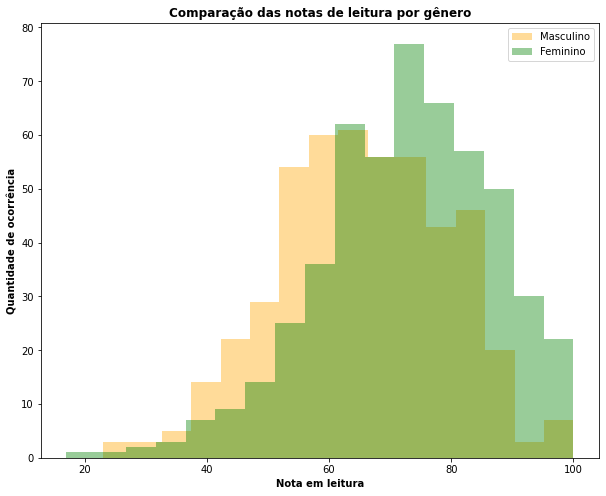

In [ ]:
plt.figure(figsize = (10,8), facecolor = 'w');
sns.distplot(df_male_reading, kde = False, label = 'Masculino', color = 'orange')
sns.distplot(df_fem_reading, kde= False, label = 'Feminino', color = 'green')
plt.title('Comparação das notas de leitura por gênero', weight = 'bold')
plt.xlabel('Nota em leitura', fontweight = 'bold')
plt.ylabel('Quantidade de ocorrência', fontweight = 'bold')
plt.legend()

print('Média das notas de leitura dos homens: {:.1f}'.format(df_male_reading.mean()))
print('Média das notas de leitura das mulheres: {:.1f}'.format(df_fem_reading.mean()))

Em relação a disciplina de leitura (`writing_score`), temos as seguintes observações:
* Menor nota: grupo femino;
* Nota máxima: ambos os grupos;
* Apesar do grupo masculino não ter a menor nota, é o que tem a menor média. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Média das notas de escrita dos homens: 63.3
Média das notas de escrita das mulheres: 72.5


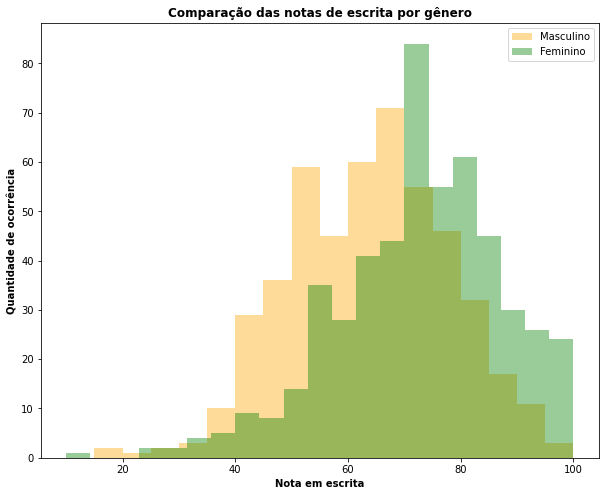

In [ ]:
plt.figure(figsize = (10,8), facecolor = 'w');
sns.distplot(df_male_writing, kde = False, label = 'Masculino', color = 'orange')
sns.distplot(df_fem_writing, kde= False, label = 'Feminino', color = 'green')
plt.title('Comparação das notas de escrita por gênero', weight = 'bold')
plt.xlabel('Nota em escrita', fontweight = 'bold')
plt.ylabel('Quantidade de ocorrência', fontweight = 'bold')
plt.legend()

print('Média das notas de escrita dos homens: {:.1f}'.format(df_male_writing.mean()))
print('Média das notas de escrita das mulheres: {:.1f}'.format(df_fem_writing.mean()))

Com o gráfico acima, podemos observar que:
* O grupo feminino possui maior quantidade de notas a partir de 50;
* O grupo masculino possui maior quantidade de notas no intervalo de 40 a 90, aproximadamente.  

#####Grupos Étnicos vs Disciplinas

In [ ]:
ga = df.loc[df['race_ethn'] == 'group A'].copy()
gb = df.loc[df['race_ethn'] == 'group B'].copy()
gc = df.loc[df['race_ethn'] == 'group C'].copy()
gd = df.loc[df['race_ethn'] == 'group D'].copy()
ge = df.loc[df['race_ethn'] == 'group E'].copy()

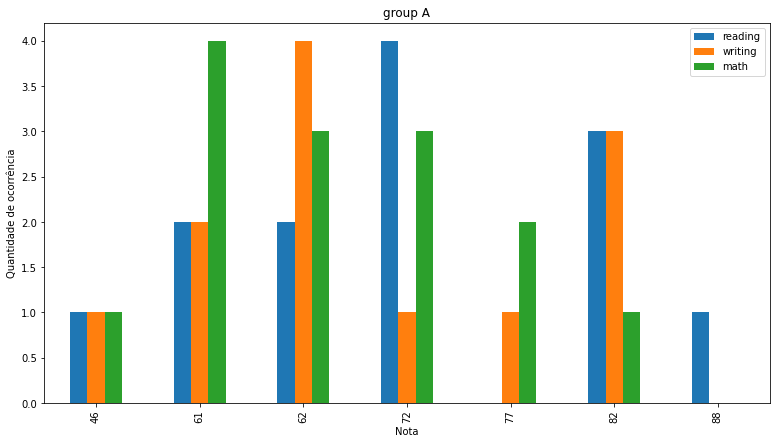

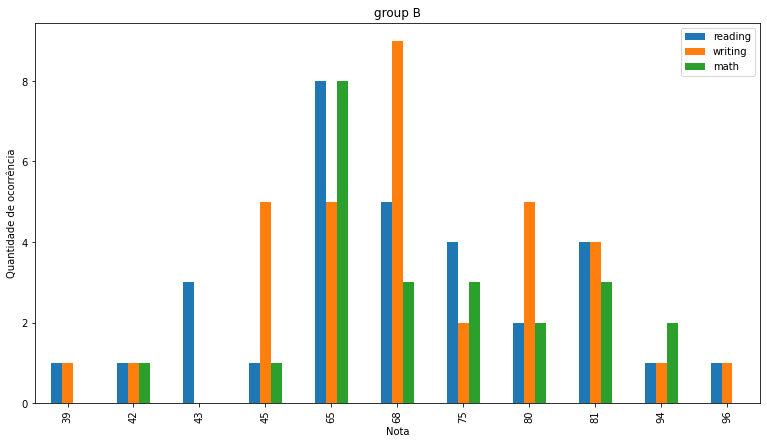

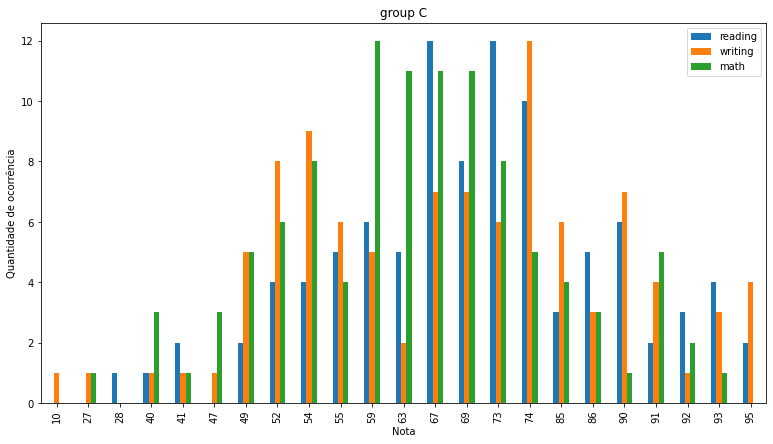

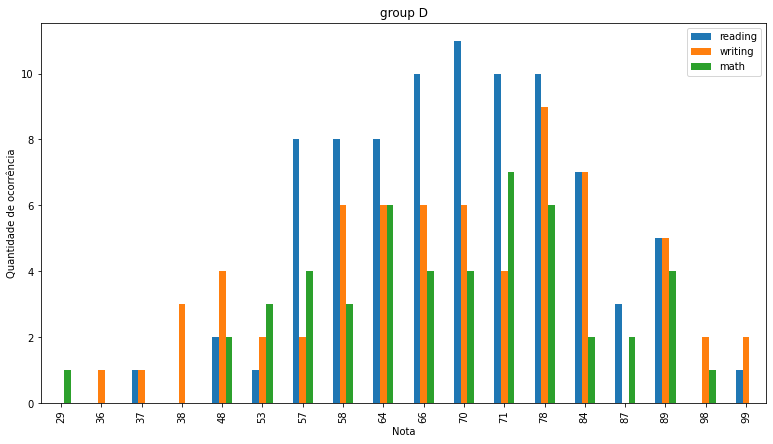

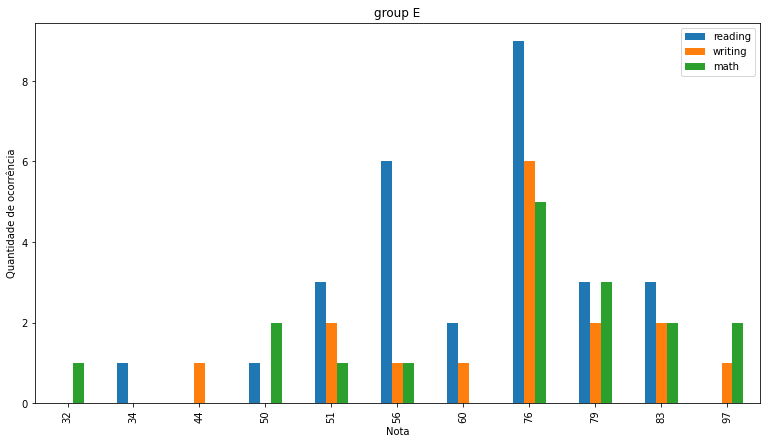

In [ ]:
for group in ['group A', 'group B', 'group C', 'group D', 'group E']:
  group_df = df.loc[df['race_ethn'] == group].copy()

  for subject in ['math', 'writing', 'reading']:
    subject_name = f'{subject}_score'
    group_df[subject] = group_df[['race_ethn', subject_name]].groupby([subject_name]).agg(['count'])

  group_df = group_df[['reading','writing','math']].fillna(0).copy()

  filter_math = (group_df.math!=0)
  filter_writing = (group_df.writing!=0)
  filter_reading = (group_df.reading!=0)

  group_df = group_df.loc[filter_math | filter_writing | filter_reading].copy()
  
  group_df.plot(kind='bar',
                title=group,
                xlabel='Nota',
                ylabel='Quantidade de ocorrência',
                figsize=(13, 7))

Em relação ao grupos étnicos:

Grupo A: 
*    As notas com a maior ocorrência na disciplina de leitura foi 72, de escrita 62 e matematica 61.
*    Disciplina com maior nota foi leitura com  88 pontos

Grupo B:
*     As notas com a maior ocorrência na disciplina de ecrita foi 68 e leitura e matemática com 65.
*    A maior nota foi 96 nas disciplinas de leitura e escrita com 96 pontos

Grupo C:
*    As notas com maior ocorrência foi escrita com 74 pontos, leitura com 73 e 67 pontos (ambas tiveram a mesma ocorrência) e matemática com 59 pontos.
*   A maior nota foi escrita e leitura com 95 pontos, tendo a escrita com a maior ocorrência comparado com a leitura.

Grupo D:
*   As notas com maior ocorrência foi leitura com 70 pontos, matemática com 71 pontos e escrita com 78 pontos.
*   A maior nota foi escrita e leitura com 99 pontos, tendo a escrita com a maior ocorrência comparado com a leitura.

Grupo E:
*     As notas com a maior ocorrência foi 76 nas três disciplinas. 
*    A maior nota foi 97 nas disciplinas de matemática  e escrita,  tendo a matemática com a maior ocorrência comparado com a escrita.


##### Curso Preparatório

none         642
completed    358
Name: test_prep_course, dtype: int64


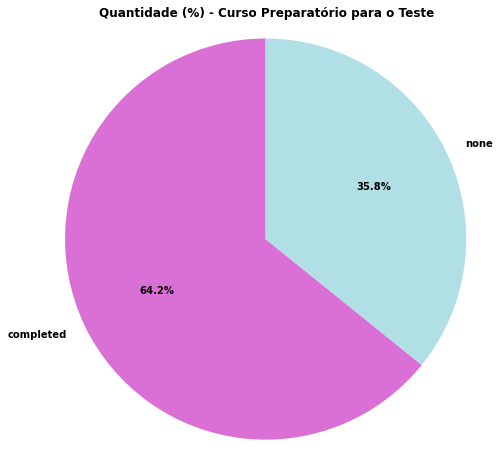

In [ ]:
print(df['test_prep_course'].value_counts())

sizes = [642,358]
colors = ['orchid','powderblue']
explode = (0, 0)
fig1, ax1 = plt.subplots(figsize = (8,8), facecolor = 'w')
_, _, autopcts = ax1.pie(sizes, colors = colors, explode = explode, labels = tpc_labels, autopct = '%1.1f%%',
                         shadow = False, startangle = 90, textprops={'fontweight': 'bold'})
ax1.axis('equal')
plt.title('Quantidade (%) - Curso Preparatório para o Teste', fontweight = 'bold')
plt.setp(autopcts, **{'weight':'bold'})
plt.show()

O dataset possui mais alunos que participaram de algum curso preratório (64,2%) comparado a quantidade dos que não participaram: 35,8%. 

##### Curso Preparatório vs Gêneros

In [ ]:
df_gen_prep = df.groupby(['gender','test_prep_course'], as_index = False)['lunch'].count().rename(columns = {'lunch':'count'})
df_gen_prep

,gender,test_prep_course,count
0,female,completed,184
1,female,none,334
2,male,completed,174
3,male,none,308


Porcentagem de homens que fizeram curso preparatório para o teste: 36.1%
Porcentagem de mulheres que fizeram curso preparatório para o teste: 35.5%


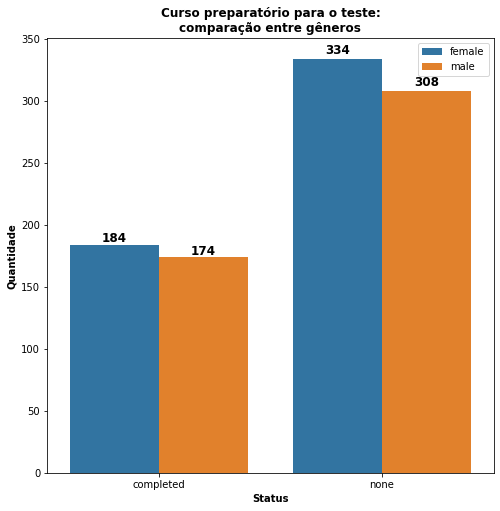

In [ ]:
plt.figure(figsize = (8,8), facecolor = 'w')
sns.barplot(data = df_gen_prep, x = 'test_prep_course', y = 'count', hue = 'gender')
plt.title('Curso preparatório para o teste:\ncomparação entre gêneros', weight = 'bold')
plt.legend(loc = 'upper right')
plt.xlabel('Status', fontweight = 'bold')
plt.ylabel('Quantidade', fontweight = 'bold')

for index, data in enumerate(df_gen_prep['count']):
  if index == 0 or index == 1:
    plt.text(x = index-0.2, y = (data*1.013), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))
  else:
    plt.text(x = index-1.8, y = (data*1.013), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))

print('Porcentagem de homens que fizeram curso preparatório para o teste: {:.1f}%'.\
      format(100*len(df_male[df_male['test_prep_course']=='completed'])/len(df_male)))

print('Porcentagem de mulheres que fizeram curso preparatório para o teste: {:.1f}%'.\
      format(100*len(df_fem[df_fem['test_prep_course']=='completed'])/len(df_fem)))

A partir do gráfico acima, podemos concluir que a maioria dos alunos (independente do gênero) não participou de curso preparatório.

##Tratamendo dos Dados

Nesta seção, os dados passam por um processo de limpeza, de verificação de existência (e possível estudo) de *outliers* e de duplicatas. 

###Verificação de Dados Faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   race_ethn         1000 non-null   object
 2   p_lev_educ        1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep_course  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


De acordo com as informações acima, o *dataset* possui 1000 instâncias (como foi explicitado anteriormente) e 8 colunas - 5 são do tipo `object` e 3 são do tipo `int64`.

Todas as colunas possuem 1000 linhas não nulas, ou seja, o *dataset* não possui valores faltantes.

###Limpeza dos Dados

Como demonstrado na seção anterior, o *dataset* possui 5 colunas do tipo `object` e  3 do tipo `int64`. O tipo de sistema de avaliação estadunidense adotado para este trabalho faz uso de porcentagens e de letras não sinalizadas (A, B, .. , E/F.). Portanto, é interessante realizar um *casting* apropriado nos atributos:

In [ ]:
def to_type(DataFrame, columns, type):
    for col in columns:
        DataFrame[col] = DataFrame[col].astype(type)

In [ ]:
numerical_cols = ['math_score', 'reading_score', 'writing_score']
categorical_cols = ['gender', 'race_ethn', 'p_lev_educ', 'lunch','test_prep_course']
 
to_type(df, numerical_cols, 'float')
to_type(df, categorical_cols, 'category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            1000 non-null   category
 1   race_ethn         1000 non-null   category
 2   p_lev_educ        1000 non-null   category
 3   lunch             1000 non-null   category
 4   test_prep_course  1000 non-null   category
 5   math_score        1000 non-null   float64 
 6   reading_score     1000 non-null   float64 
 7   writing_score     1000 non-null   float64 
dtypes: category(5), float64(3)
memory usage: 29.1 KB


Na função executada acima, classificamos os atributos conforme seu dado armazenado.

`category` é um tipo de dado da biblioteca Pandas que correspondem a variáveis ​​categóricas na Estatística. Uma variável `category` assume um número limitado e geralmente fixo de valores possíveis (categorias, níveis em R). Por exemplo: gênero, classe social, tipo sanguíneo, afiliação ao país, tempo de observação ou classificação por meio de escalas Likert.

###Verificação de Dados Duplicados

In [ ]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [gender, race_ethn, p_lev_educ, lunch, test_prep_course, math_score, reading_score, writing_score]
Index: []


Como demonstrado acima, não há duplicidades no *dataset*. Portanto, não se faz necessário o tratamento de dados duplicados. 

###Verificação de Dados Discrepantes (*outliers*)

matplotlib.axes._subplots.AxesSubplot

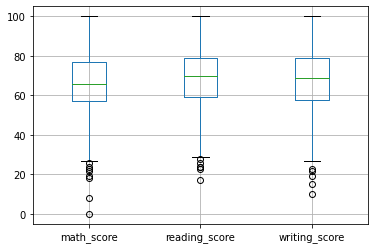

In [ ]:
boxplot = df.boxplot(column=['math_score', 'reading_score','writing_score'], return_type='axes')
type(boxplot)

Atarvés do gráfico BoxPlot, identificamos possíveis outliers existentes no *dataset*. Ao analisarmos os valores (notas), podemos observar que as notas variam no intervalo de 0 a 100, o que condiz com a realidade. Portanto, os *outliers* que vemos no gráfico permanecerão como dados válidos. 

Caso fosse necessário removê-los, conseideraríamos que, para termos um intervalo de confiança que exclua apenas os *outliers*, vamos trabalhar com dados que estão no intervalo:



formula_outliers.jpg


In [ ]:
def exclui_outliers(DataFrame, col_name):
  intervalo = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - intervalo), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + intervalo), col_name] = np.nan

In [ ]:
_df = df.copy()
numerical_cols = ['math_score', 'reading_score', 'writing_score']
for col in numerical_cols:
  exclui_outliers(_df, col)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



matplotlib.axes._subplots.AxesSubplot

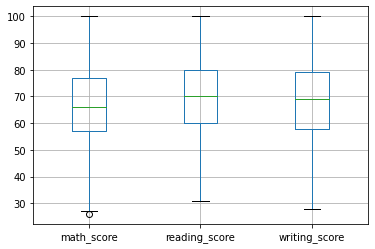

In [ ]:
boxplot = _df.boxplot(column=['math_score', 'reading_score','writing_score'], return_type='axes')
type(boxplot)

Assim, temos um novo *dataset* mais limpo.

##Análise da Importância das Features (Pré-discretização)

In [ ]:
array_n = df.values

X = array_n[:,0:5]
Y = array_n[:,5].astype(int)

labelencoder_X = LabelEncoder()
for i in range(0, 5):
  X[:, i] = labelencoder_X.fit_transform(X[:, i])

In [ ]:
def select_feature(df, function, valor):
  test = SelectKBest(function, k = valor)
  fit = test.fit(X, Y)

  np.set_printoptions(precision = 3)
  print(fit.scores_)

  features = fit.transform(X)

  print(features[0:valor,:])

  print("Features sorted by their score:")
  print(sorted(zip(map(lambda x: round(x, valor), fit.scores_), df.columns), reverse = True))

  feature_importance = fit.scores_

  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplot(1, 2, 2)
  plt.barh(pos, feature_importance[sorted_idx], align = 'center')
  m_name = np.array(df.columns)
  plt.yticks(pos, m_name[sorted_idx])
  plt.xlabel('Importância Relativa')
  plt.show()

[1.181 1.419 1.031 2.575 1.118]
[[0 1 1 1 1]
 [0 2 4 1 0]
 [0 1 3 1 1]
 [1 0 0 0 1]
 [1 2 4 1 1]]
Features sorted by their score:
[(2.57542, 'lunch'), (1.41936, 'race_ethn'), (1.18147, 'gender'), (1.11765, 'test_prep_course'), (1.03089, 'p_lev_educ')]


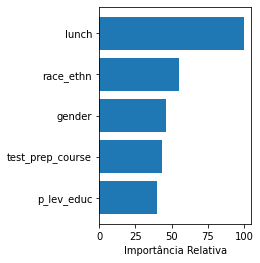

In [ ]:
select_feature(df, f_classif, 5)

[ 48.307  67.667 110.765  65.013  31.743]
[[0 1 1 1 1]
 [0 2 4 1 0]
 [0 1 3 1 1]
 [1 0 0 0 1]
 [1 2 4 1 1]]
Features sorted by their score:
[(110.76541, 'p_lev_educ'), (67.66724, 'race_ethn'), (65.01306, 'lunch'), (48.30701, 'gender'), (31.74251, 'test_prep_course')]


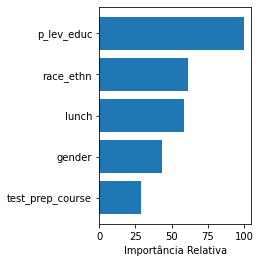

In [ ]:
select_feature(df, chi2, 5)

Inferências:
*   No método *f_classif* a variável com maior relevância é o almoço, seguido da etnia dos alunos. O nível de educação dos pais foi a variável com a menor relevância.

*   No método *chi2* ter o curso preparatório e o seu gênero são as variáveis com maior relevância, consecutivamente. E o nível de escolaridade dos pais continua sendo a variável com menor relevâcia.




##Análise de Dependência e Correlação de Features

Análise atribuída aos valores das colunas originais (não discretizadas) do *dataset* escolhido. 

###Análise dos Atributos Nominais

In [ ]:
def get_stats (serie1, serie2):
  quiquadrado, p, gl, freq_esperadas = stats.chi2_contingency(pd.crosstab(serie1, serie2))
  return [quiquadrado, p, gl]

In [ ]:
def get_dependency_table(_df, column1, column2):

  tab = pd.DataFrame(columns = ['features', 'chi2', 'p', 'gl'])

  array = get_stats(_df[column1], _df[column2])

  tab = tab.append({'features' : column1 +" X "+ column2, 
                    'chi2' : array[0], 
                    'p' : array[1],
                    'gl':array[2],
                    'dependecy': "Y" if array[1] < 0.05 else "N"}, 
                   ignore_index = True) 
  return tab

In [ ]:
print("Dependências dos Atributos Categóricos:\n")
pd.concat([get_dependency_table(df, 'gender', 'race_ethn'),  
           get_dependency_table(df, 'gender', 'p_lev_educ'),
           get_dependency_table(df, 'gender', 'lunch'),
           get_dependency_table(df, 'gender', 'test_prep_course'),
           get_dependency_table(df, 'race_ethn', 'p_lev_educ'),  
           get_dependency_table(df, 'race_ethn', 'lunch'),
           get_dependency_table(df, 'race_ethn', 'test_prep_course'),
           get_dependency_table(df, 'p_lev_educ', 'lunch'),  
           get_dependency_table(df, 'p_lev_educ', 'test_prep_course'),
           get_dependency_table(df, 'lunch', 'test_prep_course')],
          ignore_index=True)

Dependências dos Atributos Categóricos:



,features,chi2,p,gl,dependecy
0,gender X race_ethn,9.027386,0.060419,4,N
1,gender X p_lev_educ,3.384905,0.640870,5,N
2,gender X lunch,0.371738,0.542058,1,N
3,gender X test_prep_course,0.015529,0.900827,1,N
4,race_ethn X p_lev_educ,29.458662,0.079113,20,N
5,race_ethn X lunch,3.442350,0.486698,4,N
6,race_ethn X test_prep_course,5.487515,0.240829,4,N
7,p_lev_educ X lunch,1.111268,0.953101,5,N
8,p_lev_educ X test_prep_course,9.544071,0.089234,5,N
9,lunch X test_prep_course,0.220954,0.638314,1,N


A partir dos dados apresentados acima, podemos afirmar que todas as colunas categóricas são independentes umas das outras - portanto, são atributos que não apresentam redundância. 

###Análise dos Atributos Numéricos

In [ ]:
fig = px.scatter(df, 
                 x="math_score", 
                 y="writing_score",
                title="Dispersão de Notas Matemática x Escrita")
fig.show()

In [ ]:
fig = px.scatter(df, 
                 x="math_score", 
                 y="reading_score",
                title="Dispersão de Notas Matemática x Leitura")
fig.show()

In [ ]:
fig = px.scatter(df, 
                 x="reading_score", 
                 y="writing_score",
                title="Dispersão de Notas Leitura x Escrita")
fig.show()

A partir de todos os gráficos acima, podemos concluir que:
*  `math_score` possui um grau de correlação positiva com `writing_score` e `reading_score`;
*  `writing_score` e `reading_score` possuim forte correlação positiva. 

As observações acima estão de acordo com os resultados explicitados pelos métodos de avaliação de interdependência de atributos (Covariância, Spearman, Pearson e Kendall), como pode ser visto nas tabelas abaixo:

In [ ]:
corr_spearman = df.corr(method='spearman')
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')

In [ ]:
print("Covariância dos atributos numéricos")
cov = df.cov()
cov.style.background_gradient(cmap='coolwarm')

Covariância dos atributos numéricos


,math_score,reading_score,writing_score
math_score,229.918998,180.998958,184.939133
reading_score,180.998958,213.165605,211.786661
writing_score,184.939133,211.786661,230.907992


In [ ]:
print("Correlação com o Método Spearman")
corr_spearman.style.background_gradient(cmap='coolwarm')

Correlação com o Método Spearman


,math_score,reading_score,writing_score
math_score,1.000000,0.804064,0.778339
reading_score,0.804064,1.000000,0.948953
writing_score,0.778339,0.948953,1.000000


In [ ]:
print("Correlação com o Método Pearson")
corr_pearson.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson


,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


In [ ]:
print("Correlação com o Método Kendall")
corr_kendall.style.background_gradient(cmap='coolwarm')

Correlação com o Método Kendall


,math_score,reading_score,writing_score
math_score,1.000000,0.617432,0.591067
reading_score,0.617432,1.000000,0.820058
writing_score,0.591067,0.820058,1.000000


##Discretização dos Dados

###Escolaridade dos Pais

A nomenclatura definida para discretizar o atributo `p_lev_educ` é apresentada abaixo:
* "master's degree" é denominado como "graduated";
* "associates Degree, some college, bachelor's degree" são denominados como "undergraduated";
* "high school" e "some high school" são denominados como "high school".

In [ ]:
def agrupa_educacao(variavel):
  if (variavel in "master's degree"):
    return 'graduated' #anteriormente MBA
  elif (variavel in "associate's Degree, some college, bachelor's degree"):  
    return 'undergraduated' #anteriomente Nível Superior
  else:
    return 'high school' #anteriormente Nível Médio

In [ ]:
df['with_p_lev_educ'] = df['p_lev_educ'].apply(agrupa_educacao)
df

,gender,race_ethn,p_lev_educ,lunch,test_prep_course,math_score,reading_score,writing_score,with_p_lev_educ
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,undergraduated
1,female,group C,some college,standard,completed,69.0,90.0,88.0,undergraduated
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,graduated
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,high school
4,male,group C,some college,standard,none,76.0,78.0,75.0,undergraduated
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,graduated
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,high school
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,high school
998,female,group D,some college,standard,completed,68.0,78.0,77.0,undergraduated


###Notas de Matemática, Leitura e de Escrita

Uma das possibilidades observadas pela equipe foi categorizar as notas dos tópicos Matemática (`math_score`), Leitura (`reading_score`) e Escrita (`writing_score`) no padrão acadêmico de avaliação dos Estados Unidos: o uso dos conceitos A a F.

O padrão foi definido de acordo com a tabela da figura abaixo:

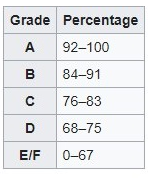

In [ ]:
def categorizar_nota(nota):
  if nota>=92:
    return 'A'
  elif nota >=84 and nota<=91:
    return 'B'
  elif nota >=76 and nota<=83:
    return 'C' 
  elif nota >=68 and nota<=75:
    return 'D'
  else:
    return 'E/F'

In [ ]:
df['reading_concept']=  df.apply(lambda row: categorizar_nota(row['reading_score']), axis = 'columns')
df['writing_concept'] = df.apply(lambda row: categorizar_nota(row['writing_score']), axis = 'columns')
df['math_concept'] = df.apply(lambda row: categorizar_nota(row['math_score']), axis = 'columns')
df

,gender,race_ethn,p_lev_educ,lunch,test_prep_course,math_score,reading_score,writing_score,with_p_lev_educ,reading_concept,writing_concept,math_concept
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,undergraduated,D,D,D
1,female,group C,some college,standard,completed,69.0,90.0,88.0,undergraduated,B,B,D
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,graduated,A,A,B
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,high school,E/F,E/F,E/F
4,male,group C,some college,standard,none,76.0,78.0,75.0,undergraduated,C,D,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,graduated,A,A,B
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,high school,E/F,E/F,E/F
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,high school,D,E/F,E/F
998,female,group D,some college,standard,completed,68.0,78.0,77.0,undergraduated,C,C,D


###Participação em Curso Preparatório

Ainda foi realizada a binarização da coluna `test_prep_course`, onde as representações são as seguintes:
*  0 significa o dado original "none" - o aluno não prestou curso preparatório para realizar o teste;
*  1 significa o dado original "completed" - o aluno atendeu a um curso preparatório para realizar o teste.

In [ ]:
def binarizar_test_prep_course(test_prep_course):
  if test_prep_course == 'completed':
    return 1
  else:
    return 0

In [ ]:
df['with_test_prep_course'] = df.apply(lambda row: binarizar_test_prep_course(row['test_prep_course']), axis = 'columns')
df

,gender,race_ethn,p_lev_educ,lunch,test_prep_course,math_score,reading_score,writing_score,with_p_lev_educ,reading_concept,writing_concept,math_concept,with_test_prep_course
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,undergraduated,D,D,D,0
1,female,group C,some college,standard,completed,69.0,90.0,88.0,undergraduated,B,B,D,1
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,graduated,A,A,B,0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,high school,E/F,E/F,E/F,0
4,male,group C,some college,standard,none,76.0,78.0,75.0,undergraduated,C,D,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,graduated,A,A,B,1
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,high school,E/F,E/F,E/F,0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,high school,D,E/F,E/F,1
998,female,group D,some college,standard,completed,68.0,78.0,77.0,undergraduated,C,C,D,1


### Gênero, Grupos Étnicos e Almoço

Para transformar uma variável contínua em uma variável categórica, se faz a discretização do mesmo. Pelo fato da variável `gender` já ser uma variável categórica e apresentar apenas dois grupos (Masculino e Feminino), não se viu a necessidade de discretizar o atributo gender. Chegou-se a mesma conclusão com os atributos `race_ethn` e `lunch`. Apesar de ambos apresentarem mais de dois grupos, ainda assim não se viu necessidade em discretizá-los.

##Análise da Importância das Features (Pós-discretização)

In [ ]:
df

,gender,race_ethn,p_lev_educ,lunch,test_prep_course,math_score,reading_score,writing_score,with_p_lev_educ,reading_concept,writing_concept,math_concept,with_test_prep_course
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,undergraduated,D,D,D,0
1,female,group C,some college,standard,completed,69.0,90.0,88.0,undergraduated,B,B,D,1
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,graduated,A,A,B,0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,high school,E/F,E/F,E/F,0
4,male,group C,some college,standard,none,76.0,78.0,75.0,undergraduated,C,D,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,graduated,A,A,B,1
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,high school,E/F,E/F,E/F,0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,high school,D,E/F,E/F,1
998,female,group D,some college,standard,completed,68.0,78.0,77.0,undergraduated,C,C,D,1


In [ ]:
cols = ['gender','race_ethn','with_p_lev_educ','lunch','with_test_prep_course',
        'reading_concept','writing_concept','math_concept']

df_pos = df[cols].copy()
array_n = df_pos.values

X = array_n[:,0:5]
Y = array_n[:,5]

labelencoder = LabelEncoder()
for i in range(0, 5):
  X[:, i] = labelencoder.fit_transform(X[:, i])

Y = labelencoder.fit_transform(Y)

[15.806  5.619  0.131 11.381 14.451]
[[0 1 2 1 0]
 [0 2 2 1 1]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 2 2 1 0]]
Features sorted by their score:
[(15.80601, 'gender'), (14.45147, 'with_test_prep_course'), (11.38149, 'lunch'), (5.61874, 'race_ethn'), (0.13082, 'with_p_lev_educ')]


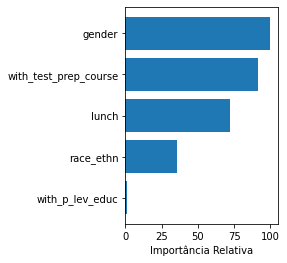

In [ ]:
select_feature(df_pos, f_classif, 5)

[30.948 13.592  0.132 15.532 35.25 ]
[[0 1 2 1 0]
 [0 2 2 1 1]
 [0 1 0 1 0]
 [1 0 1 0 0]
 [1 2 2 1 0]]
Features sorted by their score:
[(35.24998, 'with_test_prep_course'), (30.94812, 'gender'), (15.53226, 'lunch'), (13.59196, 'race_ethn'), (0.13162, 'with_p_lev_educ')]


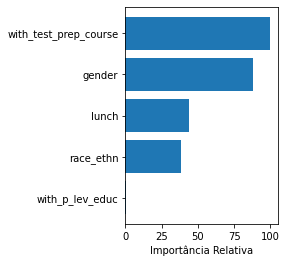

In [ ]:
select_feature(df_pos, chi2, 5)

Inferências:
*   Em ambos os métodos o nível de educação dos pais a menos relevânte e do curso preparatório e o gênero são as variávies mais relevantes. No *f_classif* o gênero é mais relevante em relação com  a variável do curso preparatório e no *chi2* o contrário.


## Análise com PCA e MDS

###PCA

In [ ]:
def conv_to_numeric(att_num):
  for i in att_num:
    df[i] = df[i].apply(lambda x: str(x). replace(",",".") if pd.notnull(x) else x)
    df[i] = pd.to_numeric(df[i])

In [ ]:
att_num = ['math_score', 'reading_score', 'writing_score']

In [ ]:
conv_to_numeric(att_num)

In [ ]:
dfr = df[['race_ethn','math_score', 'reading_score', 'writing_score']]

In [ ]:
df_remove = dfr.loc[(dfr['math_score'].isna() == True) |
                    (dfr['reading_score'].isna() == True) |
                    (dfr['writing_score'].isna() == True)]

dfr = dfr.drop(df_remove.index)

In [ ]:
dfr_race = dfr.race_ethn
dfr_n = MinMaxScaler().fit_transform(dfr[['math_score', 'reading_score', 'writing_score']])
dfr_n

array([[0.72 , 0.663, 0.711],
       [0.69 , 0.88 , 0.867],
       [0.9  , 0.94 , 0.922],
       ...,
       [0.59 , 0.651, 0.611],
       [0.68 , 0.735, 0.744],
       [0.77 , 0.831, 0.844]])

In [ ]:
pca = PCA(2)
componentesPrincipais = pca.fit_transform(dfr_n)
pompPrincDf = pd.DataFrame(data = componentesPrincipais, columns = ['pca1', 'pca2'])

In [ ]:
finalDf = pd.concat([pompPrincDf, dfr_race], axis = 1)
finalDf

,pca1,pca2,race_ethn
0,-0.090373,0.015138,group B
1,-0.304755,-0.140306,group C
2,-0.480262,0.001054,group B
3,0.347032,-0.016627,group A
4,-0.162292,0.022055,group C
...,...,...,...
995,-0.513877,-0.040376,group E
996,0.214363,0.075003,group C
997,0.041728,-0.055789,group C
998,-0.135825,-0.055674,group D


In [ ]:
pca.explained_variance_ratio_

array([0.913, 0.071])

O primeiro componente principal contém 91,3% da variação e o segundo componente
principal contém 7,1% da variação. Juntos, os dois componentes contêm 98,4% das informações.

In [ ]:
def listColorsName(c):
  L = []
  cont = 0
  for i in mcolors.CSS4_COLORS:
    L.append(i)
    cont += 1
    if cont == c:
      break;
  return L

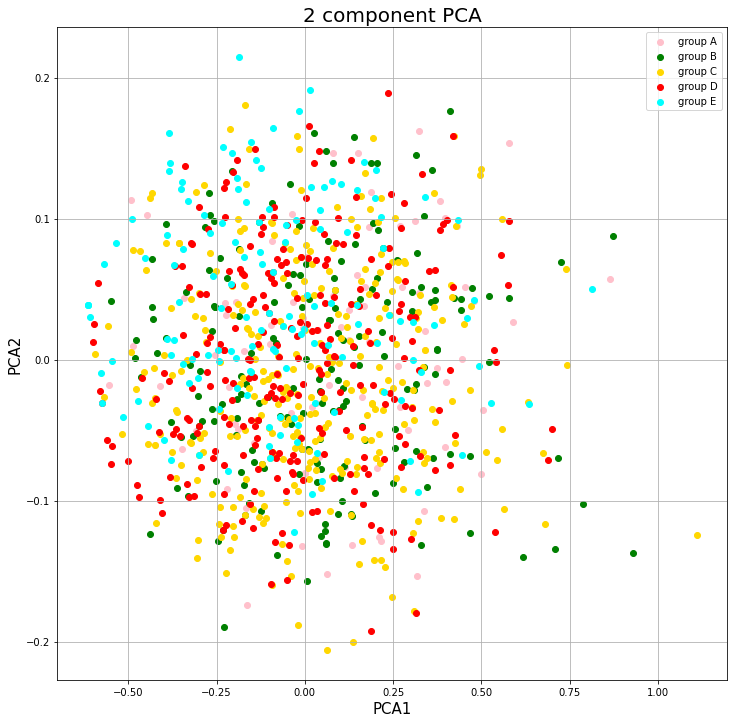

In [ ]:
fDF = finalDf.loc[0:10]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = fDF['race_ethn'].values
t_unique = targets.categories
colors = ["pink","green","gold","red","cyan"]

for target, color in zip(t_unique, colors):
  indicesToKeep = finalDf['race_ethn'] == target
  ax.scatter(finalDf.loc[indicesToKeep,'pca1'], finalDf.loc[indicesToKeep, 'pca2'], c = color)

ax.legend(t_unique)
ax.grid()

###MDS

In [ ]:
mds = MDS(2, random_state=0)

mds_dimensions = mds.fit_transform(dfr_n)

dimensionsDF = pd.DataFrame(data=mds_dimensions, columns=['dim1', 'dim2'])

finalDF = pd.concat([dimensionsDF, dfr_race], axis=1)
finalDF

,dim1,dim2,race_ethn
0,-0.035223,-0.085200,group B
1,-0.285396,-0.178863,group C
2,-0.260631,-0.404735,group B
3,0.162484,0.320743,group A
4,-0.068123,-0.150201,group C
...,...,...,...
995,-0.313071,-0.412111,group E
996,0.180776,0.139059,group C
997,-0.026541,0.068232,group C
998,-0.120118,-0.084897,group D


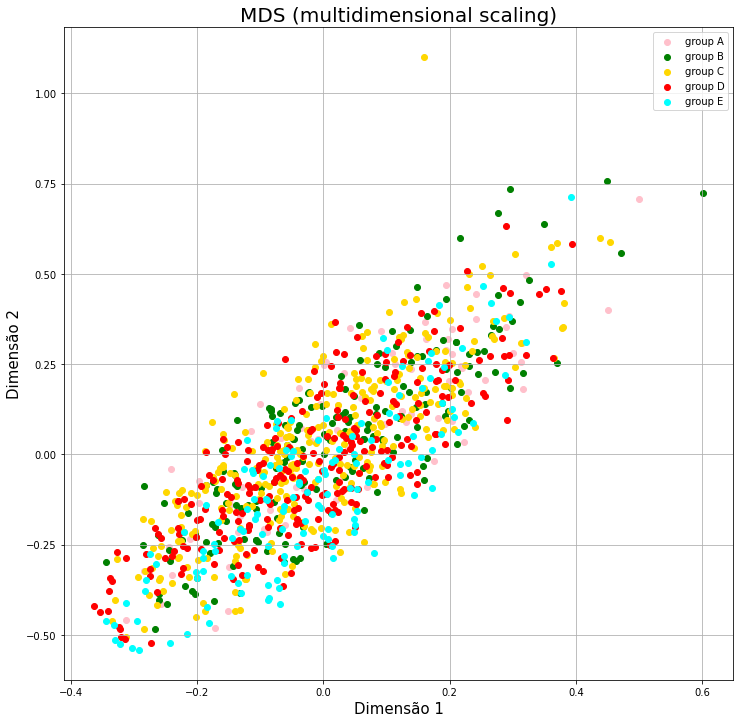

In [ ]:
fDF = finalDF.loc[0:10]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Dimensão 1', fontsize = 15)
ax.set_ylabel('Dimensão 2', fontsize = 15)
ax.set_title('MDS (multidimensional scaling)', fontsize=20)

targets = fDF['race_ethn'].values
t_unique = targets.categories
colors = ["pink","green","gold","red","cyan"]

for target, color in zip(t_unique, colors):
	indicesToKeep = finalDf['race_ethn'] == target
	ax.scatter(finalDF.loc[indicesToKeep, 'dim1'],
            finalDF.loc[indicesToKeep, 'dim2'],
            c = color)
ax.legend(t_unique)
ax.grid()

##Respondendo as Perguntas de Negócios


1. Performance dos gêneros em diferentes matérias (leitura, escrita, matemática).
*   O gênero masculino possui média das notas maior que o feminino em relação a Matemática.
*   O gênero feminino possui média das notas maior que o masculino em relação a Leitura.
*   O gênero feminino possui média das notas maior que o masculino em relação a Escrita.


2. O fato de ir bem nas matérias tem a ver com ter participado de curso preparatório?

In [ ]:
df_disc = pd.get_dummies(df, columns = ['gender', 'race_ethn', 'with_p_lev_educ', 'lunch', 'reading_concept', 'writing_concept', 'math_concept'])
df_disc = df_disc.drop(['p_lev_educ','test_prep_course','math_score', 'reading_score', 'writing_score'], axis=1)

In [ ]:
df_q2_1 =  df_disc[['with_test_prep_course', 
               'reading_concept_A',
               'reading_concept_B',
               'reading_concept_C',
               'reading_concept_D',
               'reading_concept_E/F'
               ]].copy()

df_q2_2 =  df_disc[['with_test_prep_course', 
               'writing_concept_A',
               'writing_concept_B',
               'writing_concept_C',
               'writing_concept_D',
               'writing_concept_E/F'
               ]].copy()

df_q2_3 =  df_disc[['with_test_prep_course',
               'math_concept_A',
               'math_concept_B',
               'math_concept_C',
               'math_concept_D',
               'math_concept_E/F'
               ]].copy()

In [ ]:
corr_pearson_q2_1 = df_q2_1.corr(method='pearson')
corr_pearson_q2_1.drop(['reading_concept_A', 'reading_concept_B', 'reading_concept_C', 'reading_concept_D','reading_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (with_test_prep_course x reading_concept):")
corr_pearson_q2_1.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (with_test_prep_course x reading_concept):


,with_test_prep_course
with_test_prep_course,1.000000
reading_concept_A,0.108431
reading_concept_B,0.122215
reading_concept_C,0.088464
reading_concept_D,0.014899
reading_concept_E/F,-0.208600


In [ ]:
corr_pearson_q2_2 = df_q2_2.corr(method='pearson')
corr_pearson_q2_2.drop(['writing_concept_A', 'writing_concept_B', 'writing_concept_C', 'writing_concept_D','writing_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (with_test_prep_course x writing_concept):")
corr_pearson_q2_2.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (with_test_prep_course x writing_concept):


,with_test_prep_course
with_test_prep_course,1.000000
writing_concept_A,0.131302
writing_concept_B,0.145440
writing_concept_C,0.167420
writing_concept_D,0.000152
writing_concept_E/F,-0.274711


In [ ]:
corr_pearson_q2_3 = df_q2_3.corr(method='pearson')
corr_pearson_q2_3.drop(['math_concept_A', 'math_concept_B', 'math_concept_C', 'math_concept_D','math_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (with_test_prep_course x math_concept):")
corr_pearson_q2_3.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (with_test_prep_course x math_concept):


,with_test_prep_course
with_test_prep_course,1.000000
math_concept_A,0.119100
math_concept_B,0.058128
math_concept_C,0.051582
math_concept_D,0.010074
math_concept_E/F,-0.124649


Há uma relação, embora pequena, entre boas notas (independente da matéria) e o fato de ter participado de um curso preparatório para teste. 

3. Ter direito a almoço tem a ver com ir bem nas matérias? 

In [ ]:
df_q3_1 =  df_disc[['lunch_free/reduced', 
                    'lunch_standard',
                    'reading_concept_A',
                    'reading_concept_B',
                    'reading_concept_C',
                    'reading_concept_D',
                    'reading_concept_E/F'
                    ]].copy()

df_q3_2 =  df_disc[['lunch_free/reduced', 
                    'lunch_standard',
                    'writing_concept_A',
                    'writing_concept_B',
                    'writing_concept_C',
                    'writing_concept_D',
                    'writing_concept_E/F'
                    ]].copy()

df_q3_3 =  df_disc[['lunch_free/reduced', 
                    'lunch_standard',
                    'math_concept_A',
                    'math_concept_B',
                    'math_concept_C',
                    'math_concept_D',
                    'math_concept_E/F'
                    ]].copy()

In [ ]:
corr_pearson_q3_1 = df_q3_1.corr(method='pearson')
corr_pearson_q3_1.drop(['reading_concept_A', 'reading_concept_B', 'reading_concept_C', 'reading_concept_D','reading_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (lunch x reading_concept):")
corr_pearson_q3_1.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (lunch x reading_concept):


,lunch_free/reduced,lunch_standard
lunch_free/reduced,1.000000,-1.000000
lunch_standard,-1.000000,1.000000
reading_concept_A,-0.107980,0.107980
reading_concept_B,-0.081030,0.081030
reading_concept_C,-0.065064,0.065064
reading_concept_D,-0.054082,0.054082
reading_concept_E/F,0.195812,-0.195812


In [ ]:
corr_pearson_q3_2 = df_q3_2.corr(method='pearson')
corr_pearson_q3_2.drop(['writing_concept_A', 'writing_concept_B', 'writing_concept_C', 'writing_concept_D','writing_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (lunch x writing_concept):")
corr_pearson_q3_2.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (lunch x writing_concept):


,lunch_free/reduced,lunch_standard
lunch_free/reduced,1.000000,-1.000000
lunch_standard,-1.000000,1.000000
writing_concept_A,-0.110285,0.110285
writing_concept_B,-0.081421,0.081421
writing_concept_C,-0.075753,0.075753
writing_concept_D,-0.077957,0.077957
writing_concept_E/F,0.221357,-0.221357


In [ ]:
corr_pearson_q3_3 = df_q3_3.corr(method='pearson')
corr_pearson_q3_3.drop(['math_concept_A', 'math_concept_B', 'math_concept_C', 'math_concept_D','math_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (lunch x math_concept):")
corr_pearson_q3_3.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (lunch x math_concept):


,lunch_free/reduced,lunch_standard
lunch_free/reduced,1.000000,-1.000000
lunch_standard,-1.000000,1.000000
math_concept_A,-0.111241,0.111241
math_concept_B,-0.154862,0.154862
math_concept_C,-0.099606,0.099606
math_concept_D,-0.087452,0.087452
math_concept_E/F,0.271368,-0.271368


Com os dados das tabelas acima, ainda que a correlação seja baixa, podemos inferir que:
* O aluno tem notas baixas se não tem direito a almoço ou é direito reduzido;
* O aluno tem notas altas se tem direito a almoço padrão.

4. Quem vai bem em matemática se sai bem nas outras matérias também?

In [ ]:
df_q4_1 =  df_disc[['math_concept_A',
               'math_concept_B',
               'math_concept_C',
               'math_concept_D',
               'math_concept_E/F', 
               'reading_concept_A',
               'reading_concept_B',
               'reading_concept_C',
               'reading_concept_D',
               'reading_concept_E/F'
               ]].copy()

df_q4_2 =  df_disc[['math_concept_A',
               'math_concept_B',
               'math_concept_C',
               'math_concept_D',
               'math_concept_E/F', 
               'writing_concept_A',
               'writing_concept_B',
               'writing_concept_C',
               'writing_concept_D',
               'writing_concept_E/F'
               ]].copy()

In [ ]:
corr_pearson_q4_1 = df_q4_1.corr(method='pearson')
corr_pearson_q4_1.drop(['reading_concept_A', 'reading_concept_B', 'reading_concept_C', 'reading_concept_D','reading_concept_E/F'], axis=1, inplace=True)
corr_pearson_q4_1.drop(['math_concept_A', 'math_concept_B', 'math_concept_C', 'math_concept_D','math_concept_E/F'], axis=0, inplace=True)
print("Correlação com o Método Pearson (math_concept x reading_concept):")
corr_pearson_q4_1

Correlação com o Método Pearson (math_concept x reading_concept):


,math_concept_A,math_concept_B,math_concept_C,math_concept_D,math_concept_E/F
reading_concept_A,0.454122,0.233457,0.047101,-0.108090,-0.260204
reading_concept_B,0.140914,0.279083,0.169766,-0.016842,-0.320490
reading_concept_C,-0.052446,0.032116,0.215673,0.153008,-0.270976
reading_concept_D,-0.093193,-0.052624,-0.008542,0.150404,-0.046162
reading_concept_E/F,-0.186651,-0.271525,-0.287840,-0.176554,0.570948


In [ ]:
corr_pearson_q4_2 = df_q4_2.corr(method='pearson')
corr_pearson_q4_2.drop(['writing_concept_A', 
                        'writing_concept_B', 
                        'writing_concept_C', 
                        'writing_concept_D',
                        'writing_concept_E/F'], axis=1, inplace=True)
corr_pearson_q4_2.drop(['math_concept_A', 'math_concept_B', 'math_concept_C', 'math_concept_D','math_concept_E/F'], axis=0, inplace=True)
print("Correlação com o Método Pearson (math_concept x writing_concept):")
corr_pearson_q4_2

Correlação com o Método Pearson (math_concept x writing_concept):


,math_concept_A,math_concept_B,math_concept_C,math_concept_D,math_concept_E/F
writing_concept_A,0.427716,0.260800,0.057143,-0.120233,-0.262656
writing_concept_B,0.140772,0.155895,0.235583,-0.009916,-0.302906
writing_concept_C,-0.016609,0.079959,0.119894,0.144988,-0.238113
writing_concept_D,-0.095934,0.011185,0.017992,0.095632,-0.056571
writing_concept_E/F,-0.189688,-0.283193,-0.271303,-0.128187,0.528784


Podemos observar uma relação entre o conceito máximo (A) em Matemática e as demais matérias. Porém, a correlação entre os atributos começa a decrescer a partir do conceito B. 

5. Qual seria a melhor maneira de melhorar a pontuação dos estudantes em cada teste?

In [ ]:
corr_q5_1 = df_disc.corr(method='pearson')
corr_q5_1.drop(['reading_concept_E/F',
                'writing_concept_E/F',
                'math_concept_E/F',
                'race_ethn_group A',
                'race_ethn_group B',
                'race_ethn_group C',
                'race_ethn_group D',
                'race_ethn_group E',
                'gender_female',
                'gender_male',
                'reading_concept_A',
                'reading_concept_B',
                'reading_concept_C',
                'reading_concept_D',
                'reading_concept_E/F',
                'writing_concept_A',
                'writing_concept_B',
                'writing_concept_C',
                'writing_concept_D',
                'writing_concept_E/F',
                'math_concept_A',
                'math_concept_B',
                'math_concept_C',
                'math_concept_D',
                'math_concept_E/F'                
                ], axis=1, inplace=True)
corr_q5_1.drop(['reading_concept_E/F',
                'writing_concept_E/F',
                'math_concept_E/F',
                'race_ethn_group A',
                'race_ethn_group B',
                'race_ethn_group C',
                'race_ethn_group D',
                'race_ethn_group E',
                'gender_female',
                'gender_male'
                ], axis=0, inplace=True)
corr_q5_1.style.background_gradient(cmap='coolwarm')

,with_test_prep_course,with_p_lev_educ_graduated,with_p_lev_educ_high school,with_p_lev_educ_undergraduated,lunch_free/reduced,lunch_standard
with_test_prep_course,1.000000,-0.009933,0.005418,-0.000667,0.017044,-0.017044
with_p_lev_educ_graduated,-0.009933,1.000000,-0.304766,-0.181325,0.027095,-0.027095
with_p_lev_educ_high school,0.005418,-0.304766,1.000000,-0.881377,-0.016765,0.016765
with_p_lev_educ_undergraduated,-0.000667,-0.181325,-0.881377,1.000000,0.003871,-0.003871
lunch_free/reduced,0.017044,0.027095,-0.016765,0.003871,1.000000,-1.000000
lunch_standard,-0.017044,-0.027095,0.016765,-0.003871,-1.000000,1.000000
reading_concept_A,0.108431,0.086682,-0.074767,0.034205,-0.107980,0.107980
reading_concept_B,0.122215,0.038136,-0.029110,0.011142,-0.081030,0.081030
reading_concept_C,0.088464,0.023702,-0.023427,0.012432,-0.065064,0.065064
reading_concept_D,0.014899,-0.023181,-0.002914,0.014506,-0.054082,0.054082


Podemos inferir que:
* Participar de um curso preparatório melhora a nota, principalmente a de Matemática. 
* Ter almoço padrão tem aumenta a possiblidade de tirar notas altas.

6. A escolaridade dos pais influenciam nas notas dos filhos?


In [ ]:
df_q6_1 =  df_disc[['with_p_lev_educ_graduated', 
                    'with_p_lev_educ_high school',
                    'with_p_lev_educ_undergraduated',
                    'reading_concept_A',
                    'reading_concept_B',
                    'reading_concept_C',
                    'reading_concept_D',
                    'reading_concept_E/F'
                    ]].copy()

df_q6_2 =  df_disc[['with_p_lev_educ_graduated', 
                    'with_p_lev_educ_high school',
                    'with_p_lev_educ_undergraduated',
                    'writing_concept_A',
                    'writing_concept_B',
                    'writing_concept_C',
                    'writing_concept_D',
                    'writing_concept_E/F'
                    ]].copy()

df_q6_3 =  df_disc[['with_p_lev_educ_graduated', 
                    'with_p_lev_educ_high school',
                    'with_p_lev_educ_undergraduated',
                    'math_concept_A',
                    'math_concept_B',
                    'math_concept_C',
                    'math_concept_D',
                    'math_concept_E/F'
               ]].copy()

In [ ]:
corr_pearson_q6_1 = df_q6_1.corr(method='pearson')
corr_pearson_q6_1.drop(['reading_concept_A', 'reading_concept_B', 'reading_concept_C', 'reading_concept_D','reading_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (with_p_lev_educ x reading_concept):")
corr_pearson_q6_1.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (with_p_lev_educ x reading_concept):


,with_p_lev_educ_graduated,with_p_lev_educ_high school,with_p_lev_educ_undergraduated
with_p_lev_educ_graduated,1.000000,-0.304766,-0.181325
with_p_lev_educ_high school,-0.304766,1.000000,-0.881377
with_p_lev_educ_undergraduated,-0.181325,-0.881377,1.000000
reading_concept_A,0.086682,-0.074767,0.034205
reading_concept_B,0.038136,-0.029110,0.011142
reading_concept_C,0.023702,-0.023427,0.012432
reading_concept_D,-0.023181,-0.002914,0.014506
reading_concept_E/F,-0.063918,0.073562,-0.044252


In [ ]:
corr_pearson_q6_2 = df_q6_2.corr(method='pearson')
corr_pearson_q6_2.drop(['writing_concept_A', 'writing_concept_B', 'writing_concept_C', 'writing_concept_D','writing_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (with_p_lev_educ x writing_concept):")
corr_pearson_q6_2.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (with_p_lev_educ x writing_concept):


,with_p_lev_educ_graduated,with_p_lev_educ_high school,with_p_lev_educ_undergraduated
with_p_lev_educ_graduated,1.000000,-0.304766,-0.181325
with_p_lev_educ_high school,-0.304766,1.000000,-0.881377
with_p_lev_educ_undergraduated,-0.181325,-0.881377,1.000000
writing_concept_A,0.084883,-0.096985,0.058038
writing_concept_B,0.093860,-0.084657,0.040857
writing_concept_C,-0.049405,-0.008915,0.033711
writing_concept_D,0.034246,-0.016649,0.000205
writing_concept_E/F,-0.084881,0.115293,-0.076944


In [ ]:
corr_pearson_q6_3 = df_q6_3.corr(method='pearson')
corr_pearson_q6_3.drop(['math_concept_A', 'math_concept_B', 'math_concept_C', 'math_concept_D','math_concept_E/F'], axis=1, inplace=True)
print("Correlação com o Método Pearson (with_p_lev_educ x math_concept):")
corr_pearson_q6_3.style.background_gradient(cmap='coolwarm')

Correlação com o Método Pearson (with_p_lev_educ x math_concept):


,with_p_lev_educ_graduated,with_p_lev_educ_high school,with_p_lev_educ_undergraduated
with_p_lev_educ_graduated,1.000000,-0.304766,-0.181325
with_p_lev_educ_high school,-0.304766,1.000000,-0.881377
with_p_lev_educ_undergraduated,-0.181325,-0.881377,1.000000
math_concept_A,0.012435,-0.056312,0.051977
math_concept_B,0.058232,-0.035728,0.008007
math_concept_C,0.064735,-0.047125,0.016549
math_concept_D,-0.036423,-0.011473,0.029913
math_concept_E/F,-0.054842,0.084993,-0.060556


As notas mais altas(A e B) tem correlação com os níveis de escolaridade mais altas (`graduated` e `undergraduated`). O fato dos pais não terem completado o ensino médio não mostra uma correlação com as notas (para melhor ou pior).